<a href="https://colab.research.google.com/github/VOL-EM2024/mo/blob/main/_%22%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/OnlineRetail.csv", encoding='ISO-8859-1')
df # чтение файла


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [4]:
from sklearn.model_selection import train_test_split

df, x_test, y, y_test = train_test_split(df,df.index,test_size=0.2,train_size=0.5)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416936,572566,82484,WOOD BLACK BOARD ANT WHITE FINISH,2,25-10-2011 10:17,7.95,13050.0,United Kingdom
495739,578321,20728,LUNCH BAG CARS BLUE,200,23-11-2011 16:59,1.45,12557.0,Spain
408187,571931,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,1,19-10-2011 16:59,2.46,NaN,United Kingdom
326587,565569,21003,ROSE DU SUD CUSHION COVER,6,05-09-2011 12:21,6.35,14111.0,United Kingdom
206398,554935,22925,BLUE GIANT GARDEN THERMOMETER,2,27-05-2011 13:30,5.95,14338.0,United Kingdom
...,...,...,...,...,...,...,...,...
207753,555000,22470,HEART OF WICKER LARGE,6,31-05-2011 08:03,2.95,18232.0,United Kingdom
318773,564838,21931,JUMBO STORAGE BAG SUKI,3,30-08-2011 12:43,4.13,NaN,United Kingdom
290795,562417,84970S,HANGING HEART ZINC T-LIGHT HOLDER,5,04-08-2011 16:32,2.08,NaN,United Kingdom
420656,572901,22962,JAM JAR WITH PINK LID,2,26-10-2011 14:54,0.85,16332.0,United Kingdom


In [5]:
from numpy import nan

def convert_to_float(df, column_name):
    df[column_name] = df[column_name].astype(str).str.replace('[^0-9.]', '', regex=True).replace('', nan).astype(float)
    return df[column_name]

df['Quantity'] = convert_to_float(df, 'Quantity')
df['UnitPrice'] = convert_to_float(df, 'UnitPrice')
df['InvoiceNo'] = convert_to_float(df, 'InvoiceNo')

Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [6]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

'\nПредварительно - оптимизируйте ваш набор данных.\n1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)\n2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)\n3. Скопируйте df в df_cluster # df_cluster = df.copy()\nдалее вы работаете с ним\n4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные\n5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки\n'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270954 entries, 416936 to 103890
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    270954 non-null  float64
 1   StockCode    270954 non-null  object 
 2   Description  270252 non-null  object 
 3   Quantity     270954 non-null  float64
 4   InvoiceDate  270954 non-null  object 
 5   UnitPrice    270954 non-null  float64
 6   CustomerID   203449 non-null  float64
 7   Country      270954 non-null  object 
dtypes: float64(4), object(4)
memory usage: 18.6+ MB


колонка "CustomerID" выделяется, поэтому мы удаляем его

In [8]:
df = df.drop(columns = ['CustomerID', 'InvoiceNo', 'StockCode', 'InvoiceDate'])
df


,Description,Quantity,UnitPrice,Country
416936,WOOD BLACK BOARD ANT WHITE FINISH,2.0,7.95,United Kingdom
495739,LUNCH BAG CARS BLUE,200.0,1.45,Spain
408187,ANTIQUE SILVER TEA GLASS ENGRAVED,1.0,2.46,United Kingdom
326587,ROSE DU SUD CUSHION COVER,6.0,6.35,United Kingdom
206398,BLUE GIANT GARDEN THERMOMETER,2.0,5.95,United Kingdom
...,...,...,...,...
207753,HEART OF WICKER LARGE,6.0,2.95,United Kingdom
318773,JUMBO STORAGE BAG SUKI,3.0,4.13,United Kingdom
290795,HANGING HEART ZINC T-LIGHT HOLDER,5.0,2.08,United Kingdom
420656,JAM JAR WITH PINK LID,2.0,0.85,United Kingdom


<AxesSubplot: >

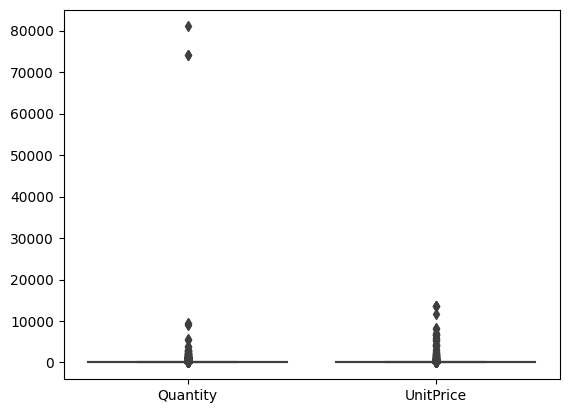

In [9]:
sns.boxplot(df)

 Выбросы есть, поэтому их нужно удалить

In [10]:
!pip install detectorusoutlierus==0.0.1b0


In [11]:
from detectorusoutlierus import outliers as do


In [12]:
#Методом среднего
outlier_detector = do.Outline(df)
columns = ['Quantity', 'UnitPrice']
for col in columns:
    outliers_kvart = outlier_detector.detect_outlier_mean_std(col)
    df = pd.concat([df, outliers_kvart, outliers_kvart]).drop_duplicates(keep=False)
df

,Description,Quantity,UnitPrice,Country
495739,LUNCH BAG CARS BLUE,200.0,1.45,Spain
326587,ROSE DU SUD CUSHION COVER,6.0,6.35,United Kingdom
380019,PINK POLKADOT WRAP,50.0,0.36,United Kingdom
343147,DOORMAT AIRMAIL,150.0,4.58,United Kingdom
53405,JUMBO STORAGE BAG SKULLS,41.0,4.13,United Kingdom
...,...,...,...,...
383145,REGENCY CAKESTAND 3 TIER,1.0,12.75,Cyprus
66077,GREEN POLKADOT BOWL,16.0,1.25,Netherlands
400727,SET OF SALT AND PEPPER TOADSTOOLS,1.0,1.00,United Kingdom
212086,REGENCY TEA PLATE ROSES,12.0,1.65,Netherlands


<AxesSubplot: >

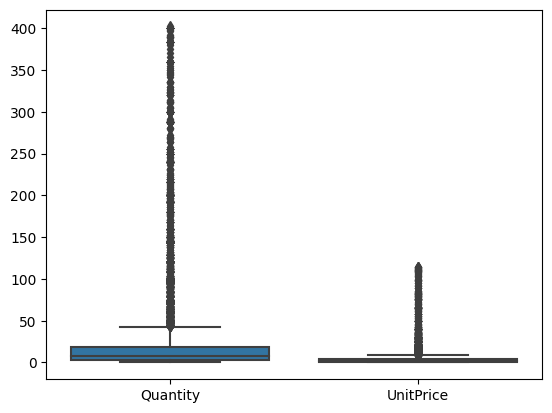

In [13]:
sns.boxplot(df)

убрали выбросы)

In [14]:
df_cluster = df.copy()

array([[<AxesSubplot: title={'center': 'Quantity'}>,
        <AxesSubplot: title={'center': 'UnitPrice'}>]], dtype=object)

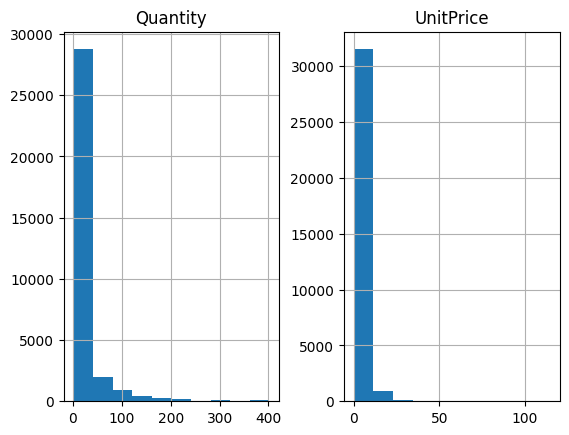

In [15]:
df_cluster.hist()

In [16]:
df_cluster = df[['UnitPrice', 'Quantity']]
df_cluster

,UnitPrice,Quantity
495739,1.45,200.0
326587,6.35,6.0
380019,0.36,50.0
343147,4.58,150.0
53405,4.13,41.0
...,...,...
383145,12.75,1.0
66077,1.25,16.0
400727,1.00,1.0
212086,1.65,12.0


In [17]:
from sklearn.preprocessing import StandardScaler

features = ['UnitPrice', 'Quantity']
df_cluster[features] =  StandardScaler().fit_transform(df_cluster[features])

<ipython-input-17-360a89ed0451>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[features] =  StandardScaler().fit_transform(df_cluster[features])


In [18]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

'\nЗдесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.\n'

In [19]:
X = df_cluster.to_numpy()

In [20]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=3)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-21-47d38194aa89>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df["UnitPrice"], df["Quantity"], s=50, cmap='viridis')


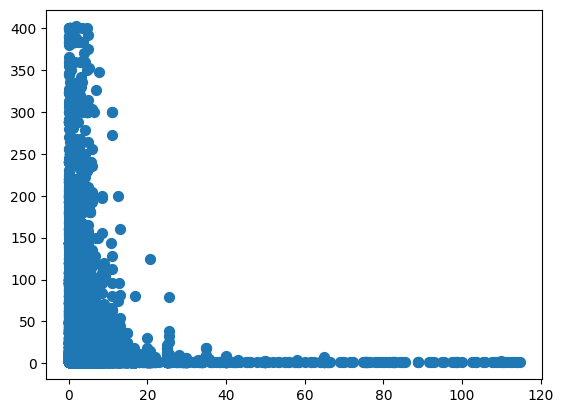

In [21]:
plt.scatter(df["UnitPrice"], df["Quantity"], s=50, cmap='viridis')

plt.show()

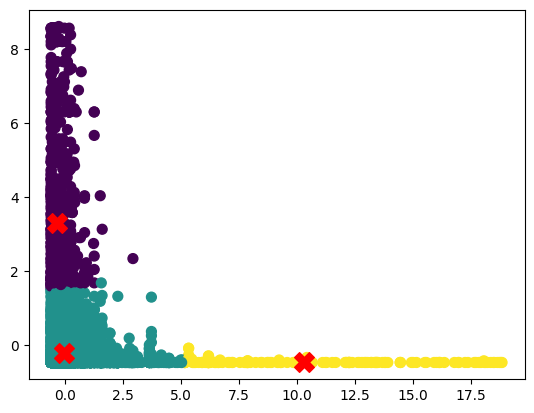

In [22]:
plt.scatter(df_cluster["UnitPrice"], df_cluster["Quantity"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')

plt.show()

In [23]:
from sklearn.metrics import silhouette_score
# Визуализируем результаты кластеризации
AUTO_N_INIT = 'auto'
range_n_clusters = range(2,10)

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=AUTO_N_INIT)
    cluster_labels = kmeans.fit_predict(X)

    # Вычисление силуэтной оценки
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

# Определение оптимального числа кластеров для данных Wine
optimal_n_clusters = max(silhouette_scores, key=lambda x: x[1])[0]
print('Оптимальное число кластеров:', optimal_n_clusters)
silhouette_scores

Оптимальное число кластеров: 3


[(2, 0.7552527801705723),
 (3, 0.7710818912777843),
 (4, 0.6292947320254226),
 (5, 0.6637876565532307),
 (6, 0.604282916807283),
 (7, 0.6027411857778288),
 (8, 0.5116494782777266),
 (9, 0.46475761837478974)]

In [24]:
list(range(2,10))

[2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
silhouette_scores

[(2, 0.7552527801705723),
 (3, 0.7710818912777843),
 (4, 0.6292947320254226),
 (5, 0.6637876565532307),
 (6, 0.604282916807283),
 (7, 0.6027411857778288),
 (8, 0.5116494782777266),
 (9, 0.46475761837478974)]

<ipython-input-26-42a743389b23>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(list(range(2,10)), [item[1] for item in silhouette_scores], cmap='viridis')


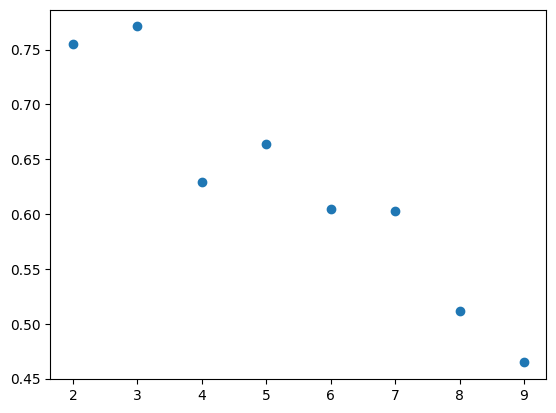

In [26]:
plt.scatter(list(range(2,10)), [item[1] for item in silhouette_scores], cmap='viridis')

In [27]:
print(cluster_centers) # центры кластеров в двумерном пространстве

[[-0.32480548  3.29480773]
 [-0.03775175 -0.21206631]
 [10.29319935 -0.45210049]]


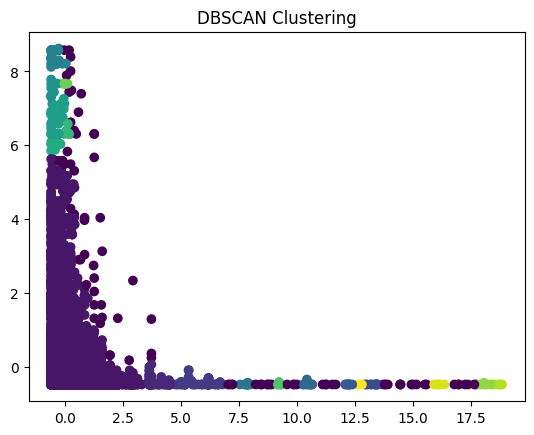

In [28]:
from sklearn.cluster import DBSCAN


# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [29]:
df_cluster['dbscan_labels'] = labels

<ipython-input-29-8f0301993488>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['dbscan_labels'] = labels


In [30]:
df_cluster.groupby('dbscan_labels', observed=True).agg(['count','mean', 'std', 'min', 'max']).T

dbscan_labels          -1             0           1          2          3   \
UnitPrice count  87.000000  32167.000000  109.000000  66.000000  12.000000   
          mean    5.949299     -0.069585    3.965717   5.819066  13.289603   
          std     6.118716      0.525687    0.356233   0.554440   0.230182   
          min    -0.249556     -0.579714    3.644615   4.770539  12.911050   
          max    17.704267      3.314457    4.563978   6.797201  13.678032   
Quantity  count  87.000000  32167.000000  109.000000  66.000000  12.000000   
          mean    2.178766     -0.053268   -0.420846  -0.428159  -0.469717   
          std     3.030718      0.783427    0.096673   0.080077   0.000000   
          min    -0.469717     -0.469717   -0.469717  -0.469717  -0.469717   
          max     8.574728      5.627916    0.074310  -0.084364  -0.469717   

dbscan_labels           4          5          6          7          8   \
UnitPrice count  10.000000  15.000000  14.000000  62.000000  24.000000   
          mean   12.216872  10.474879   7.844636  -0.418267  -0.505217   
          std     0.090599   0.118572   0.103564   0.137495   0.072491   
          min    12.076343  10.256241   7.543866  -0.579714  -0.579714   
          max    12.381104  10.659203   7.994235   0.055205  -0.334212   
Quantity  count  10.000000  15.000000  14.000000  62.000000  24.000000   
          mean   -0.469717  -0.454605  -0.460002   8.401063   7.593402   
          std     0.000000   0.034977   0.017135   0.176776   0.159794   
          min    -0.469717  -0.469717  -0.469717   8.121372   7.123990   
          max    -0.469717  -0.333710  -0.424381   8.620063   7.781355   

dbscan_labels           9          10        11        12        13  \
UnitPrice count  50.000000  83.000000  9.000000  6.000000  6.000000   
          mean   -0.353988  -0.440776  0.155663  9.248836  0.013442   
          std     0.171923   0.093752  0.079446  0.064579  0.068722   
          min    -0.579714  -0.579714 -0.017599  9.172645 -0.080244   
          max    -0.005747  -0.175059  0.227903  9.325026  0.122930   
Quantity  count  50.000000  83.000000  9.000000  6.000000  6.000000   
          mean    6.562282   6.033205  6.348248 -0.458383  7.668017   
          std     0.302921   0.027964  0.091922  0.027762  0.000000   
          min     6.307950   5.854594  6.307950 -0.469717  7.668017   
          max     7.259997   6.103940  6.579963 -0.401713  7.668017   

dbscan_labels           14         15         16         17  
UnitPrice count   8.000000   6.000000   6.000000   3.000000  
          mean   18.070192  18.649591  16.107375  12.697153  
          std     0.156531   0.153992   0.149023   0.089980  
          min    17.832944  18.445853  15.902789  12.619834  
          max    18.337493  18.826804  16.344693  12.795918  
Quantity  count   8.000000   6.000000   6.000000   3.000000  
          mean   -0.461216  -0.469717  -0.469717  -0.469717  
          std     0.016865   0.000000   0.000000   0.000000  
          min    -0.469717  -0.469717  -0.469717  -0.469717  
          max    -0.424381  -0.469717  -0.469717  -0.469717

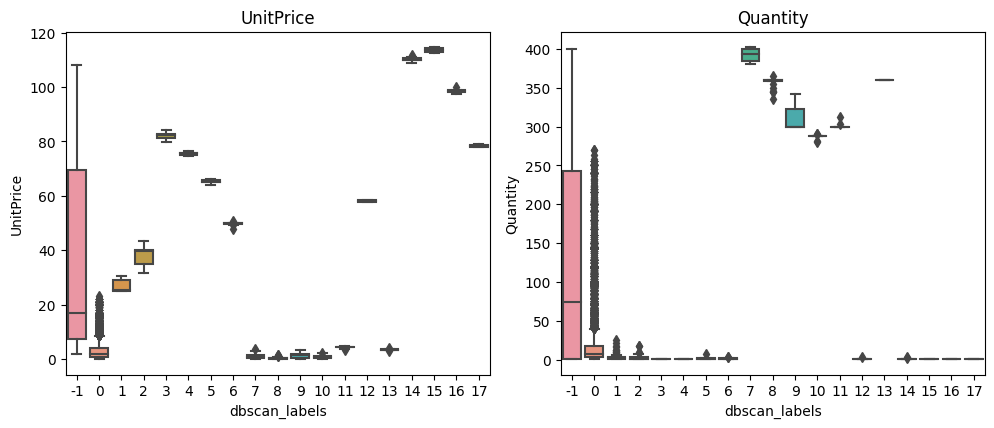

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))

# Создание boxplot для каждой колонки с разделением по меткам кластеров
for i, column in enumerate(df_cluster.columns[:-1], 1):  # Исключаем последний столбец 'labels'
    plt.subplot(5, 3, i)  # Установка 5 строк и 3 столбцов для графиков
    sns.boxplot(data=df_cluster, x='dbscan_labels', y=df[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

In [32]:
df_cluster

,UnitPrice,Quantity,dbscan_labels
495739,-0.334212,4.041172,0
326587,0.495416,-0.356378,0
380019,-0.518762,0.641005,0
343147,0.195734,2.907783,0
53405,0.119544,0.436995,0
...,...,...,...
383145,1.579011,-0.469717,0
66077,-0.368074,-0.129700,0
400727,-0.410402,-0.469717,0
212086,-0.300350,-0.220371,0


In [33]:
df

,Description,Quantity,UnitPrice,Country
495739,LUNCH BAG CARS BLUE,200.0,1.45,Spain
326587,ROSE DU SUD CUSHION COVER,6.0,6.35,United Kingdom
380019,PINK POLKADOT WRAP,50.0,0.36,United Kingdom
343147,DOORMAT AIRMAIL,150.0,4.58,United Kingdom
53405,JUMBO STORAGE BAG SKULLS,41.0,4.13,United Kingdom
...,...,...,...,...
383145,REGENCY CAKESTAND 3 TIER,1.0,12.75,Cyprus
66077,GREEN POLKADOT BOWL,16.0,1.25,Netherlands
400727,SET OF SALT AND PEPPER TOADSTOOLS,1.0,1.00,United Kingdom
212086,REGENCY TEA PLATE ROSES,12.0,1.65,Netherlands


In [34]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

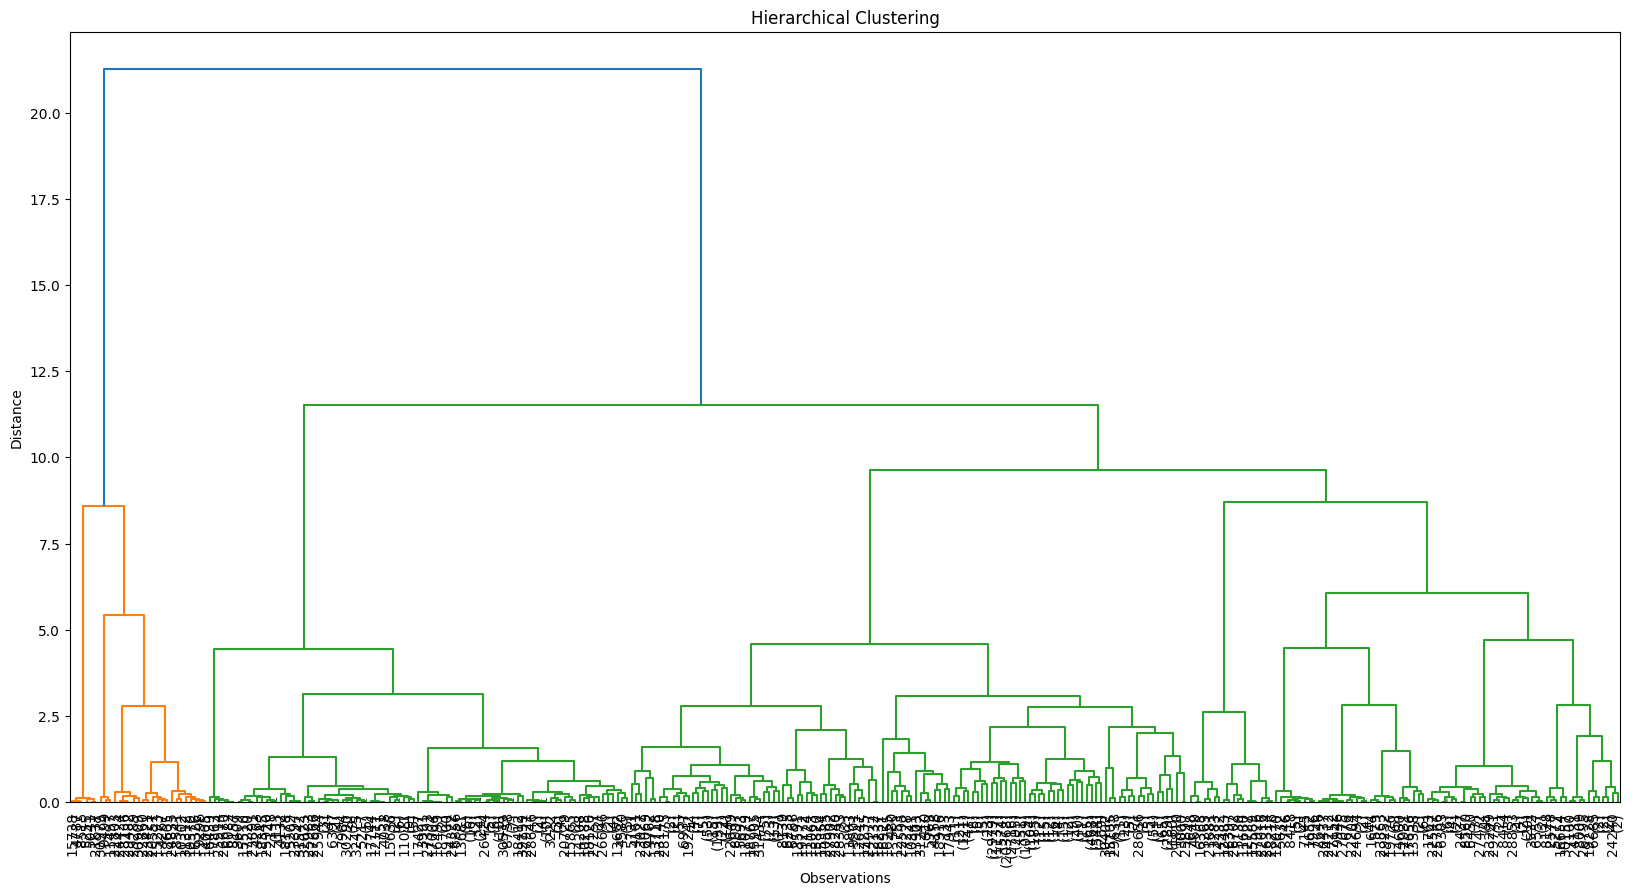

In [35]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

hc_average = linkage(df_cluster, "average")

plt.figure(figsize=(20, 10))
plt.title("Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average,
           leaf_font_size=10,
           p=10,
           show_contracted=True,
          truncate_mode='level')
plt.show()




In [33]:
import sys
!{sys.executable} -m pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0f15dac0237ece3ca22c8df275ba8d56f0f6031f3d10c37d02bdb9df1a725a4f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unin

In [35]:
%pip install pandas-profiling==3.6.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.8/328.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 118.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 119.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 126.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 21.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
  Attempting uninstall: tqdm
 

In [45]:
pip install pydantic

In [46]:
pip install typing-extensions --upgrade


In [1]:
import pandas_profiling

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [36]:
cust = df.profile_report()

In [37]:
cust

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
cust.to_file("profiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Это ужас какой-то, с вас новые нервы**

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here